In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.datasets import cifar100 # Importing the CIFAR100 Data
from keras import utils

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the CIFAR100 Data
# Dividing the data into train and test sets

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
print(x_train.shape)

(50000, 32, 32, 3)


In [ ]:
print(x_test.shape)

(10000, 32, 32, 3)


In [ ]:
print(y_test.shape)

(10000, 1)


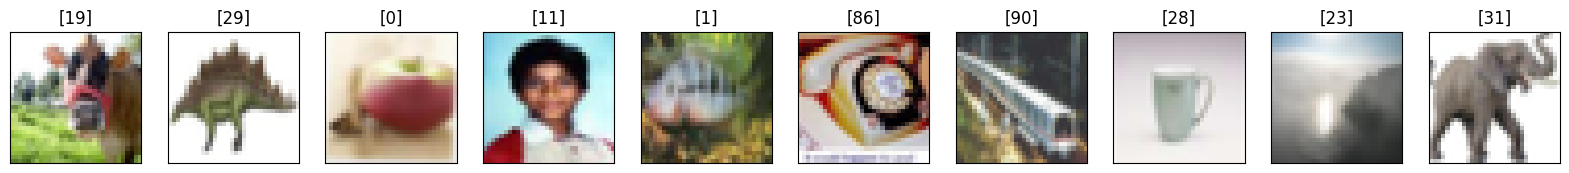

In [ ]:
# Plot the first 10 images using imshow()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
# Loop through the first 10 images
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i])
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

# Show the plot
plt.show()

In [ ]:
# Create a sequential model

model = Sequential()

In [ ]:
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), activation='relu', strides=(4,4)))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), activation='relu', strides=(1,1), padding='same'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# Flatting
model.add(Flatten())

# Passing it to a Fully Connected layer
# 1st FC Layer
model.add(Dense(4096, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# 2nd FC Layer
model.add(Dense(4096, activation='relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# 3rd Output Layer
model.add(Dense(100, activation='softmax'))